<a href="https://colab.research.google.com/github/Arpiii2209/AirQualityMadrid/blob/main/2_An%C3%A1lisis_descriptivo_de_la_calidad_del_aire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

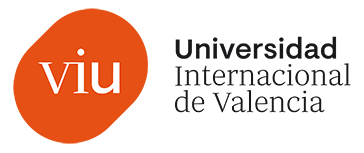

# **Análisis espacial de la calidad del aire en la Comunidad de Madrid**

## **Análisis descriptivo**

##### Autor: Arpita Jiménez Morán

A partir del archivo '*1. Extracción y transformación los datos de calidad del aire.ipynb*', donde se llevó a cabo el proceso de extracción y transformación de los datos, del cual disponemos, se ha creado el archivo **database_restructured.csv**. En este notebook se realizará el análisis descriptivo de los datos.

En este análisis, nos centraremos en estudiar tres contaminantes principales que afectan a la Comunidad de Madrid: NO2, O3 y PM10.

Además, analizaremos la situación de los tres contaminantes antes y después del COVID-19. Donde este análisis nos permitirá comprender mejor cómo ha variado la calidad del aire en relación con estos contaminantes clave durante y después de la pandemia.








<a name="indice"></a>
## **Índice del Google Colab**

0. [Preliminares](#Preliminares)
1. [Selección de los datos](#Selección)
2. [Exploración de los datos](#Exploración)
3. [Análisis descriptivo de los datos para las magnitudes O3, NO2 y PM10](#Analisis)
    1. [Estaciones de estudio de la calidad del aire](#Estaciones)
    2. [Análisis de la magnitud 14: Ozono Tropósferico](#Analisis03)
    3. [Análisis de la magnitud 8: Dióxido de Nitrógeno](#AnalisisNO2)
    4. [Análisis de la magnitud 10: Partículas PM10](#AnalisisPM10)
    5. [Análisis de los tres contaminantes que más afectan a la Comunidad de Madrid](#Analisis4)
    6. [Análisis pre y post COVID-19](#Analisis5)
        1. [Magnitud 14 (Ozono Tropósferico)](#Analisis03covid)
        2. [Magnitud 8 (Dióxido de Niotrógeno)](#AnalisisNO2covid)
        3. [Magnitud 10 (Partículas PM10)](#AnalisisPM10covid)
    7. [Calculadoras](#Calculadoras)
        1. [Calcula de días de mayor o menor valor en relación a una magnitud](#Calculadora1)
        2. [Calcula Índice de Calidad del Aire (ICA)](#Calculadora2)










<a name="Preliminares"></a>
## **Preliminares**
([Índice](#indice))

La ejecución de esta parte inicial de código nos permite acceder a los archivos y datos almacenados en Google Drive directamente desde el Notebook de Google Colab.

Se monta Google Drive en Colab para acceder a los archivos y directorios como si estuvieran almacenados localmente en la máquina virtual.

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


Se establece el directorio raíz donde se encuentran los archivos y datos del proyecto.

In [ ]:
BASE_FOLDER='/content/gdrive/MyDrive/TFM - Calidad del aire en la Comunidad de Madrid'

Se agrega el directorio a la lista de rutas donde Python buscará al intentar importar librerías en caso de necesitarlo.

In [ ]:
import sys

In [ ]:
sys.path.append(BASE_FOLDER)

Ahora sí, el entorno está preparado para importar las librerías que se encuentran en este directorio en caso de necesitarlo.

<a name="Selección"></a>
## **Selección de los datos**
([Índice](#indice))

In [ ]:
import pandas as pd
import os

In [ ]:
# Read csv from generated file
data_folder = os.path.join(BASE_FOLDER, "data")
transformed_data_folder = os.path.join(data_folder, 'transformed')
database_restructured_path = os.path.join(transformed_data_folder, 'database_restructured.csv')

database_restructured_df = pd.read_csv(database_restructured_path)
display(database_restructured_df)

,ESTACION,ANO,MES,DIA,BEN,CH4,CO,EBE,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,SO2,TCH,TOL
0,4,2001,1,1,NaN,NaN,0.8,NaN,NaN,45.0,58.0,127.0,NaN,NaN,NaN,17.0,NaN,NaN
1,4,2001,1,2,NaN,NaN,0.5,NaN,NaN,12.0,60.0,78.0,NaN,NaN,NaN,15.0,NaN,NaN
2,4,2001,1,3,NaN,NaN,0.6,NaN,NaN,32.0,65.0,114.0,NaN,NaN,NaN,15.0,NaN,NaN
3,4,2001,1,4,NaN,NaN,0.5,NaN,NaN,29.0,63.0,108.0,NaN,NaN,NaN,15.0,NaN,NaN
4,4,2001,1,5,NaN,NaN,1.0,NaN,NaN,91.0,57.0,197.0,NaN,NaN,NaN,16.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201595,60,2023,12,27,NaN,NaN,NaN,NaN,NaN,50.0,60.0,137.0,19.0,23.0,NaN,NaN,NaN,NaN
201596,60,2023,12,28,NaN,NaN,NaN,NaN,NaN,67.0,59.0,163.0,19.0,30.0,NaN,NaN,NaN,NaN
201597,60,2023,12,29,NaN,NaN,NaN,NaN,NaN,68.0,60.0,164.0,15.0,28.0,NaN,NaN,NaN,NaN
201598,60,2023,12,30,NaN,NaN,NaN,NaN,NaN,33.0,49.0,99.0,21.0,18.0,NaN,NaN,NaN,NaN


<a name="Exploración"></a>
## **Exploración de los datos**
([Índice](#indice))

Para llevar a cabo el análisis descriptivo, nos centramos en los tres contaminantes principales en la Comunidad de Madrid: NO2, O3 y PM10.

Por lo tanto, hemos reducido el conjunto de datos para incluir únicamente estas magnitudes reduciendo así el número de columnas.

In [ ]:
magnitud_n_restructured_df = database_restructured_df[['ESTACION', 'ANO', 'MES', 'DIA', 'NO2', 'O3', 'PM10']]
display(magnitud_n_restructured_df)

,ESTACION,ANO,MES,DIA,NO2,O3,PM10
0,4,2001,1,1,58.0,NaN,NaN
1,4,2001,1,2,60.0,NaN,NaN
2,4,2001,1,3,65.0,NaN,NaN
3,4,2001,1,4,63.0,NaN,NaN
4,4,2001,1,5,57.0,NaN,NaN
...,...,...,...,...,...,...,...
201595,60,2023,12,27,60.0,19.0,23.0
201596,60,2023,12,28,59.0,19.0,30.0
201597,60,2023,12,29,60.0,15.0,28.0
201598,60,2023,12,30,49.0,21.0,18.0


<a name="Analisis"></a>
## **Análisis descriptivo de los datos para las magnitudes O3, NO2 y PM10**
([Índice](#indice))


In [ ]:
# Librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<a name="Estaciones"></a>
### **Estaciones de estudio de la calidad del aire**
([Índice](#indice))

En el gráfico de barras inferior se puede visualizar la completitud de los datos en cada estación de control de calidad del aire, destacando las estaciones 24, 18 y 8

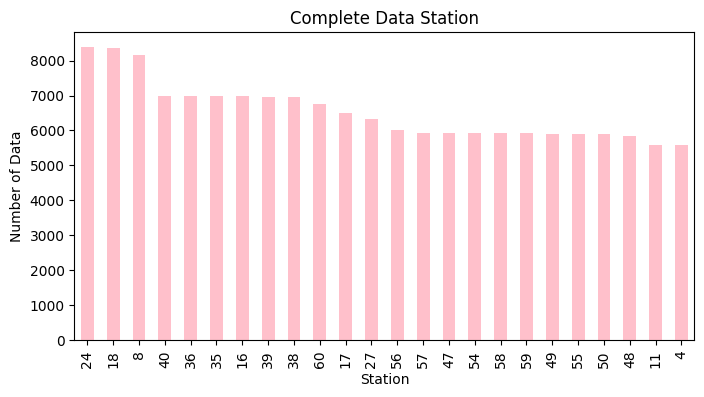

In [ ]:
station = magnitud_n_restructured_df.groupby('ESTACION').count().mean(axis=1)
sort_station = station.sort_values(ascending=False)

plt.figure(figsize=(8, 4))
sort_station.plot(kind='bar', color='pink')
plt.title('Complete Data Station')
plt.xlabel('Station')
plt.ylabel('Number of Data')
plt.show()

<a name="Analisis03"></a>
### **Análisis de la magnitud 14: Ozono Tropósferico**
([Índice](#indice))

Estudio de la magnitud 14 entre los años 2001 al 2023

Information about stations:
Station with highest O3: 60 with value 56.29
Station with lowest O3: 8 with value 38.47



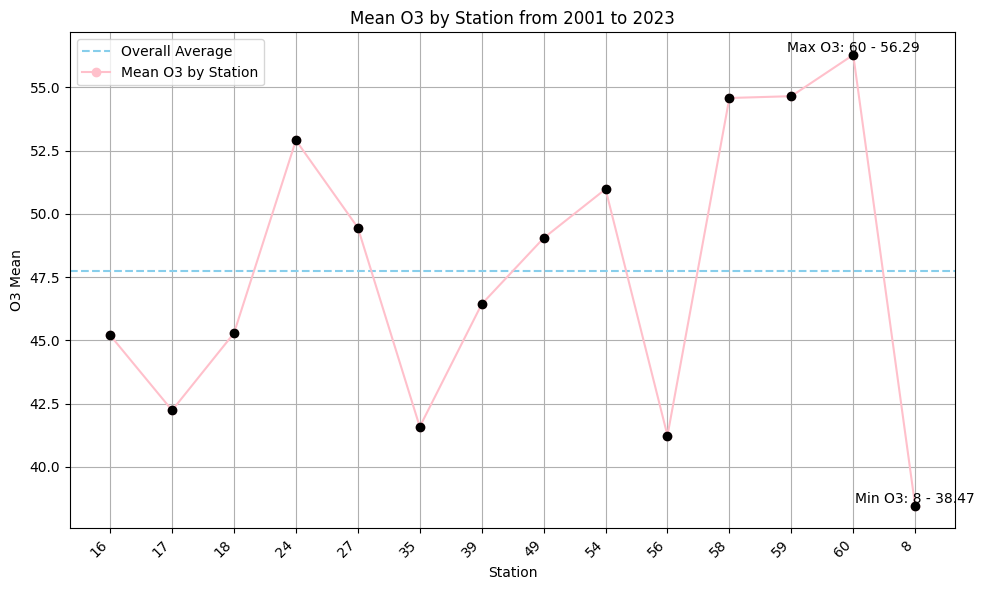

In [ ]:
df_period = magnitud_n_restructured_df[(magnitud_n_restructured_df['ANO'] >= 2001) & (magnitud_n_restructured_df['ANO'] <= 2023) & (~magnitud_n_restructured_df['O3'].isna())].copy()

# Convert station value to string
df_period['ESTACION'] = df_period['ESTACION'].astype(str)

# Group by 'ESTACION' and calculate the mean of 'O3' for the period
o3_mean_by_station_period = df_period.groupby(['ESTACION'])['O3'].mean().reset_index()

# Get the station with the highest and lowest O3 values
station_max_o3 = o3_mean_by_station_period.loc[o3_mean_by_station_period['O3'].idxmax()]
station_min_o3 = o3_mean_by_station_period.loc[o3_mean_by_station_period['O3'].idxmin()]

# Print additional information
print("Information about stations:")
print(f"Station with highest O3: {station_max_o3['ESTACION']} with value {station_max_o3['O3']:.2f}")
print(f"Station with lowest O3: {station_min_o3['ESTACION']} with value {station_min_o3['O3']:.2f}")
print()

# Create the scatter plot with lines
overall_mean = o3_mean_by_station_period['O3'].mean()
fig, ax = plt.subplots(figsize=(10, 6))
plt.axhline(y=overall_mean, color='skyblue', linestyle='--', label='Overall Average')
plt.plot(o3_mean_by_station_period['ESTACION'], o3_mean_by_station_period['O3'], marker='o', color='pink', label='Mean O3 by Station')

for station, mean in zip(o3_mean_by_station_period['ESTACION'], o3_mean_by_station_period['O3']):
    plt.plot(station, mean, marker='o', color='black')

plt.title('Mean O3 by Station from 2001 to 2023')
plt.xlabel('Station')
plt.ylabel('O3 Mean')
plt.xticks(rotation=45, ha='right')

plt.text(station_max_o3['ESTACION'], station_max_o3['O3'], f"Max O3: {station_max_o3['ESTACION']} - {station_max_o3['O3']:.2f}", ha='center', va='bottom')
plt.text(station_min_o3['ESTACION'], station_min_o3['O3'], f"Min O3: {station_min_o3['ESTACION']} - {station_min_o3['O3']:.2f}", ha='center', va='bottom')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

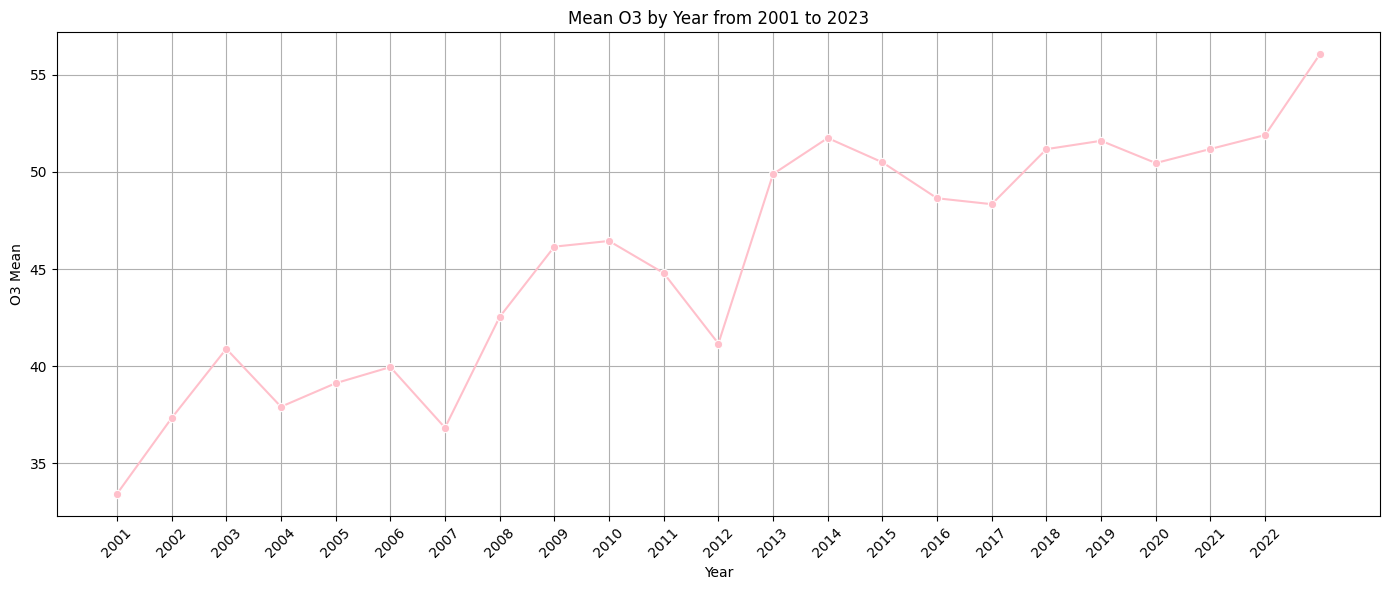

In [ ]:
o3_mean_by_year = df_period.groupby(['ANO'])['O3'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=o3_mean_by_year, x='ANO', y='O3', marker='o', color='pink')

plt.title('Mean O3 by Year from 2001 to 2023')
plt.xlabel('Year')
plt.ylabel('O3 Mean')
plt.xticks(range(2001, 2023), rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

<a name="AnalisisNO2"></a>
### **Análisis de la magnitud 8: Dióxido de Nitrógeno**
([Índice](#indice))

Estudio de la magnitud 10 entre los años 2001 al 2023

Information about stations:
Station with highest NO2: 8 with value 55.19
Station with lowest NO2: 58 with value 16.83



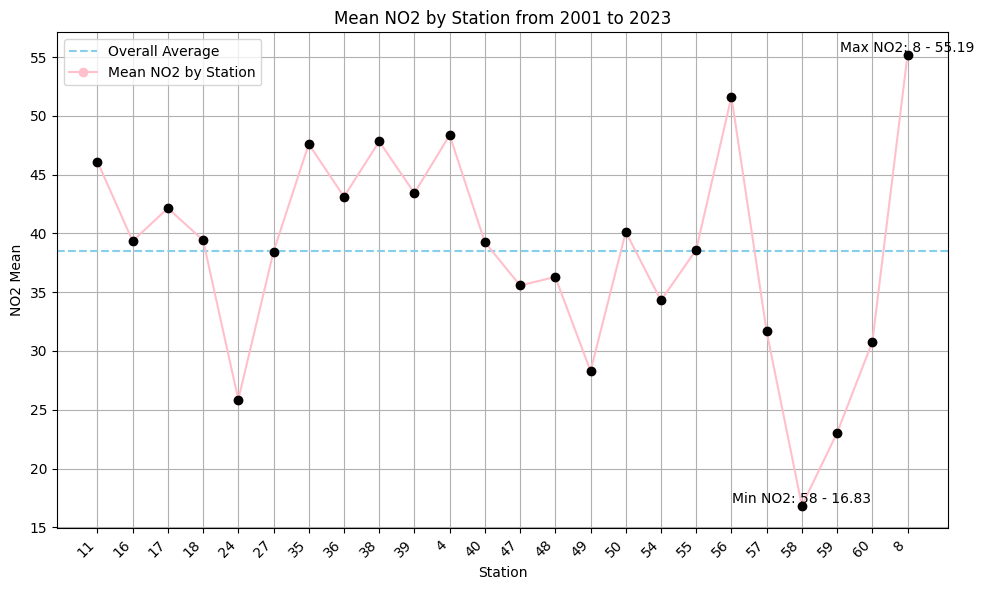

In [ ]:
df_period = magnitud_n_restructured_df[(magnitud_n_restructured_df['ANO'] >= 2001) & (magnitud_n_restructured_df['ANO'] <= 2023) & (~magnitud_n_restructured_df['NO2'].isna())].copy()

# Convert station value to string
df_period['ESTACION'] = df_period['ESTACION'].astype(str)

# Group by 'ESTACION' and calculate the mean of 'NO2' for the period
no2_mean_by_station_period = df_period.groupby(['ESTACION'])['NO2'].mean().reset_index()

# Get the station with the highest and lowest NO2 values
station_max_no2 = no2_mean_by_station_period.loc[no2_mean_by_station_period['NO2'].idxmax()]
station_min_no2 = no2_mean_by_station_period.loc[no2_mean_by_station_period['NO2'].idxmin()]

# Print additional information
print("Information about stations:")
print(f"Station with highest NO2: {station_max_no2['ESTACION']} with value {station_max_no2['NO2']:.2f}")
print(f"Station with lowest NO2: {station_min_no2['ESTACION']} with value {station_min_no2['NO2']:.2f}")
print()

# Create the scatter plot with lines
overall_mean = no2_mean_by_station_period['NO2'].mean()
fig, ax = plt.subplots(figsize=(10, 6))
plt.axhline(y=overall_mean, color='skyblue', linestyle='--', label='Overall Average')
plt.plot(no2_mean_by_station_period['ESTACION'], no2_mean_by_station_period['NO2'], marker='o', color='pink', label='Mean NO2 by Station')

for station, mean in zip(no2_mean_by_station_period['ESTACION'], no2_mean_by_station_period['NO2']):
    plt.plot(station, mean, marker='o', color='black')

plt.title('Mean NO2 by Station from 2001 to 2023')
plt.xlabel('Station')
plt.ylabel('NO2 Mean')
plt.xticks(rotation=45, ha='right')

plt.text(station_max_no2['ESTACION'], station_max_no2['NO2'], f"Max NO2: {station_max_no2['ESTACION']} - {station_max_no2['NO2']:.2f}", ha='center', va='bottom')
plt.text(station_min_no2['ESTACION'], station_min_no2['NO2'], f"Min NO2: {station_min_no2['ESTACION']} - {station_min_no2['NO2']:.2f}", ha='center', va='bottom')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

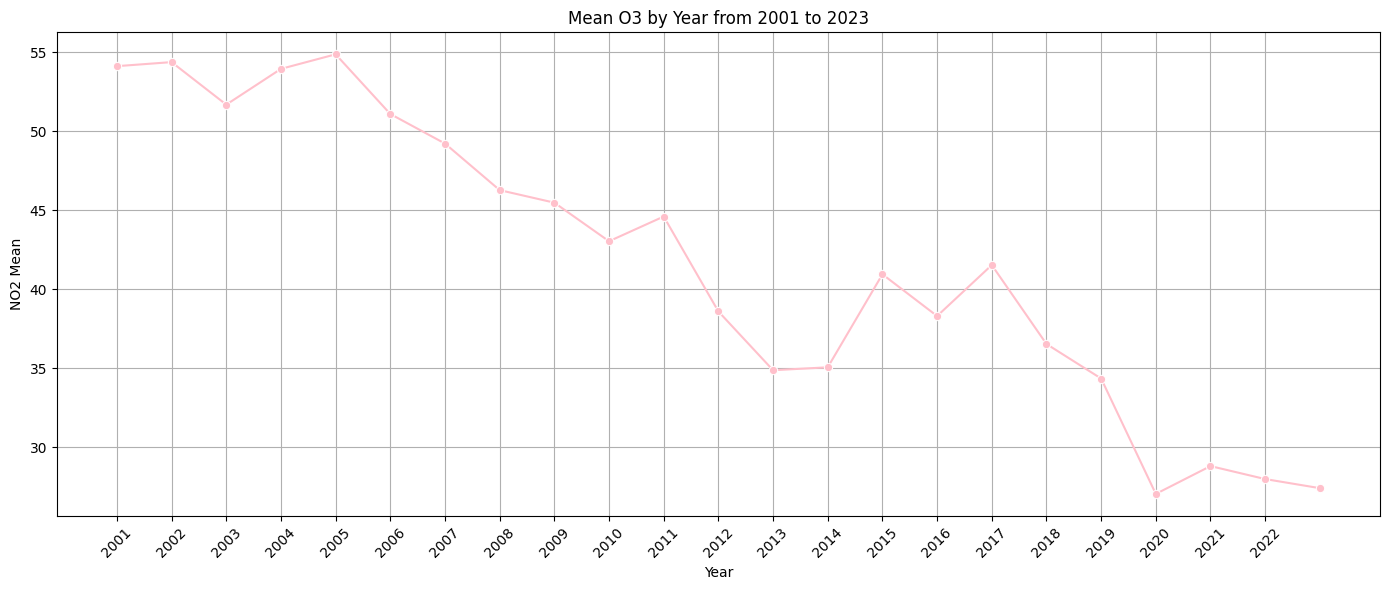

In [ ]:
o3_mean_by_year = df_period.groupby(['ANO'])['NO2'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=o3_mean_by_year, x='ANO', y='NO2', marker='o', color='pink')

plt.title('Mean O3 by Year from 2001 to 2023')
plt.xlabel('Year')
plt.ylabel('NO2 Mean')
plt.xticks(range(2001, 2023), rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

<a name="AnalisisPM10"></a>
### **Análisis de la magnitud 10: Partículas PM10**
([Índice](#indice))

Estudio de la magnitud 10 entre los años 2001 al 2023

Information about stations:
Station with highest PM10: 40 with value 26.53
Station with lowest PM10: 60 with value 17.52



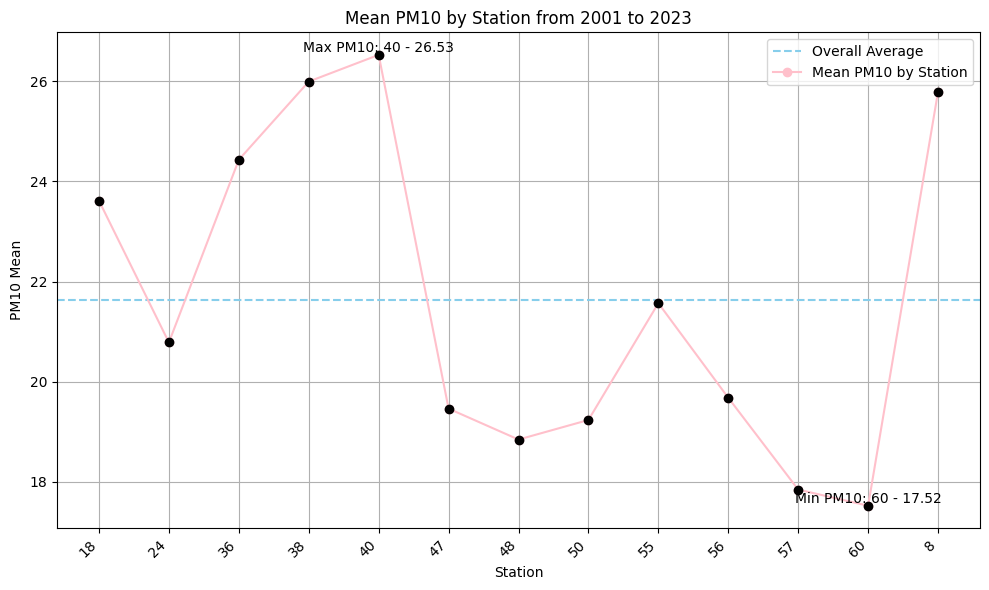

In [ ]:
df_period = magnitud_n_restructured_df[(magnitud_n_restructured_df['ANO'] >= 2001) & (magnitud_n_restructured_df['ANO'] <= 2023) & (~magnitud_n_restructured_df['PM10'].isna())].copy()

# Convert station value to string
df_period['ESTACION'] = df_period['ESTACION'].astype(str)

# Group by 'ESTACION' and calculate the mean of 'PM10' for the period
pm10_mean_by_station_period = df_period.groupby(['ESTACION'])['PM10'].mean().reset_index()

# Get the station with the highest and lowest PM10 values
station_max_pm10 = pm10_mean_by_station_period.loc[pm10_mean_by_station_period['PM10'].idxmax()]
station_min_pm10 = pm10_mean_by_station_period.loc[pm10_mean_by_station_period['PM10'].idxmin()]

# Print additional information
print("Information about stations:")
print(f"Station with highest PM10: {station_max_pm10['ESTACION']} with value {station_max_pm10['PM10']:.2f}")
print(f"Station with lowest PM10: {station_min_pm10['ESTACION']} with value {station_min_pm10['PM10']:.2f}")
print()

# Create the scatter plot with lines
overall_mean = pm10_mean_by_station_period['PM10'].mean()
fig, ax = plt.subplots(figsize=(10, 6))
plt.axhline(y=overall_mean, color='skyblue', linestyle='--', label='Overall Average')
plt.plot(pm10_mean_by_station_period['ESTACION'], pm10_mean_by_station_period['PM10'], marker='o', color='pink', label='Mean PM10 by Station')

for station, mean in zip(pm10_mean_by_station_period['ESTACION'], pm10_mean_by_station_period['PM10']):
    plt.plot(station, mean, marker='o', color='black')

plt.title('Mean PM10 by Station from 2001 to 2023')
plt.xlabel('Station')
plt.ylabel('PM10 Mean')
plt.xticks(rotation=45, ha='right')

plt.text(station_max_pm10['ESTACION'], station_max_pm10['PM10'], f"Max PM10: {station_max_pm10['ESTACION']} - {station_max_pm10['PM10']:.2f}", ha='center', va='bottom')
plt.text(station_min_pm10['ESTACION'], station_min_pm10['PM10'], f"Min PM10: {station_min_pm10['ESTACION']} - {station_min_pm10['PM10']:.2f}", ha='center', va='bottom')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

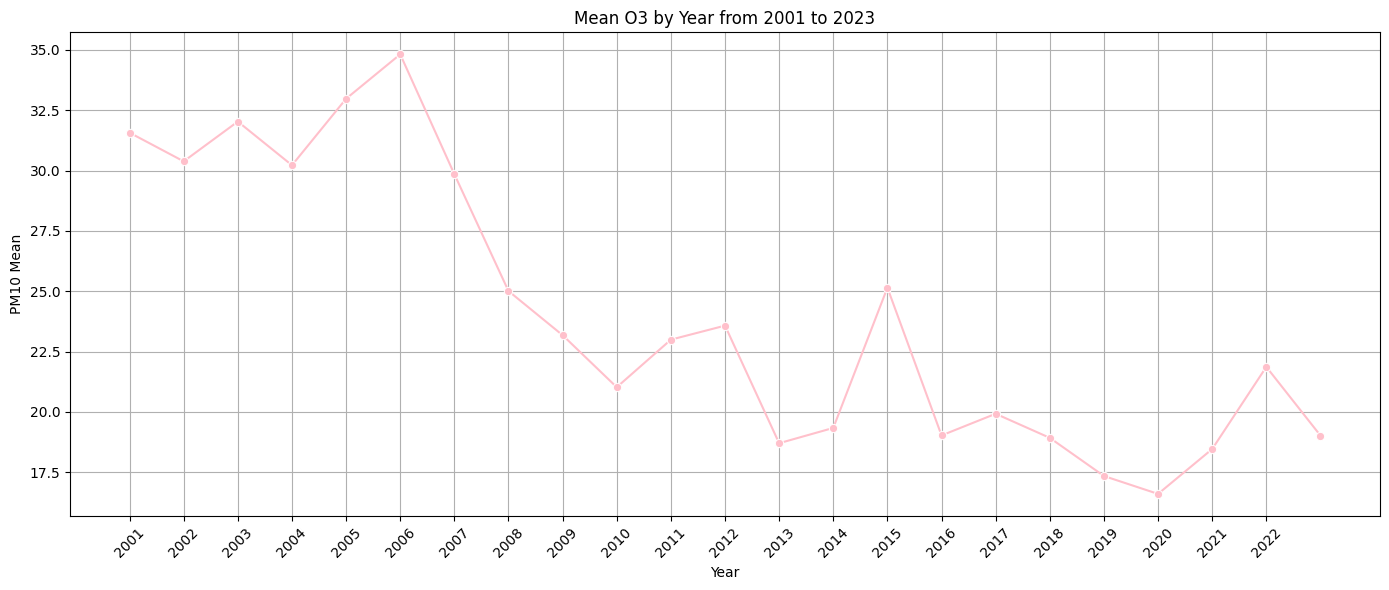

In [ ]:
o3_mean_by_year = df_period.groupby(['ANO'])['PM10'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=o3_mean_by_year, x='ANO', y='PM10', marker='o', color='pink')

plt.title('Mean O3 by Year from 2001 to 2023')
plt.xlabel('Year')
plt.ylabel('PM10 Mean')
plt.xticks(range(2001, 2023), rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

<a name="Analisis4"></a>
### **Análisis de los tres contaminantes que más afectan a la Comunidad de Madrid**
([Índice](#indice))

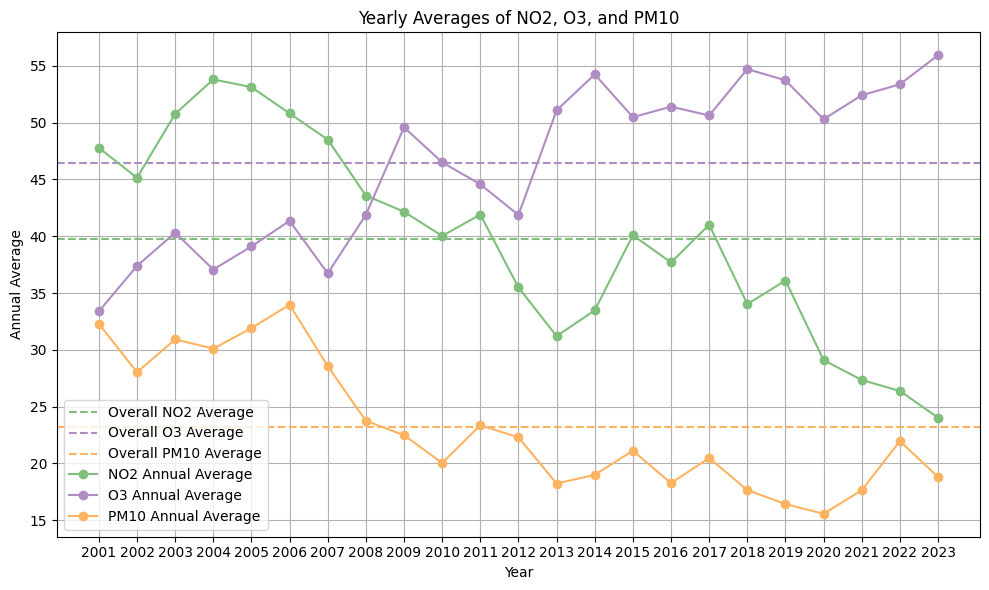

In [ ]:
# Filter data for the years 2001 to 2023 and remove rows with NaN in any of the three pollutants
df_period = magnitud_n_restructured_df[(magnitud_n_restructured_df['ANO'] >= 2001) & (magnitud_n_restructured_df['ANO'] <= 2023) & (~magnitud_n_restructured_df['NO2'].isna()) &
 (~magnitud_n_restructured_df['O3'].isna()) & (~magnitud_n_restructured_df['PM10'].isna())].copy()

# Calculate mean values of NO2, O3, and PM10 for each year
annual_means_df = df_period.groupby('ANO').agg({'NO2': 'mean', 'O3': 'mean', 'PM10': 'mean'}).reset_index()

# Plotting
overall_no2_mean = annual_means_df['NO2'].mean()
overall_o3_mean = annual_means_df['O3'].mean()
overall_pm10_mean = annual_means_df['PM10'].mean()

fig, ax = plt.subplots(figsize=(10, 6))

plt.axhline(y=overall_no2_mean, color='#7fbf7b', linestyle='--', label='Overall NO2 Average')
plt.axhline(y=overall_o3_mean, color='#af8dc3', linestyle='--', label='Overall O3 Average')
plt.axhline(y=overall_pm10_mean, color='#fdb462', linestyle='--', label='Overall PM10 Average')

plt.plot(annual_means_df['ANO'], annual_means_df['NO2'], marker='o', color='#7fbf7b', label='NO2 Annual Average')
plt.plot(annual_means_df['ANO'], annual_means_df['O3'], marker='o', color='#af8dc3', label='O3 Annual Average')
plt.plot(annual_means_df['ANO'], annual_means_df['PM10'], marker='o', color='#fdb462', label='PM10 Annual Average')

plt.title('Yearly Averages of NO2, O3, and PM10')
plt.xlabel('Year')
plt.ylabel('Annual Average')
plt.xticks(range(2001, 2024))

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<a name="Analisis5"></a>
### **Análisis pre y post COVID-19**
([Índice](#indice))

El COVID-19 fue una catástrofe que afectó a millones de personas en el mundo.
Si nos enfocamos en España, el número de muertos ascendió a la cantidad de
121.852.

Por lo tanto, es importante analizar los contaminantes antes y después del
COVID-19 para evaluar sus posibles impactos. El estudio más realista se llevaría a cabo en los años 2019 y 2021, cuando la situación de COVID-19 mejoró notablemente.

<a name="Analisis03covid"></a>
#### **Magnitud 14 (Ozono Troposférico)**

([Índice](#indice))

Information about stations in 2019:
Station with highest O3 in 2019: 60 with value 63.13
Station with lowest O3 in 2019: 16 with value 34.72



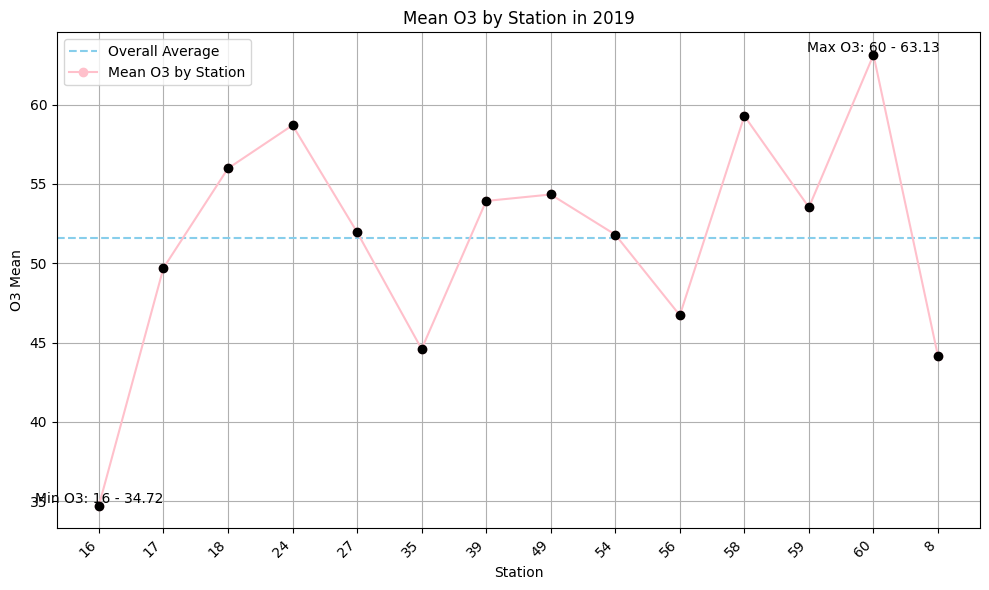

In [ ]:
# Filter data for the year 2019 and remove rows with NaN in 'O3'
df_2019_o3 = magnitud_n_restructured_df[(magnitud_n_restructured_df['ANO'] == 2019) & (~magnitud_n_restructured_df['O3'].isna())].copy()

# Convert station value to string
df_2019_o3['ESTACION'] = df_2019_o3['ESTACION'].astype(str)

# Group by 'ESTACION' and calculate the mean of 'O3' for the year 2019
o3_mean_by_station_2019 = df_2019_o3.groupby(['ESTACION'])['O3'].mean().reset_index()

# Get the station with the highest and lowest O3 values
station_max_o3_2019 = o3_mean_by_station_2019.loc[o3_mean_by_station_2019['O3'].idxmax()]
station_min_o3_2019 = o3_mean_by_station_2019.loc[o3_mean_by_station_2019['O3'].idxmin()]

# Print additional information
print("Information about stations in 2019:")
print(f"Station with highest O3 in 2019: {station_max_o3_2019['ESTACION']} with value {station_max_o3_2019['O3']:.2f}")
print(f"Station with lowest O3 in 2019: {station_min_o3_2019['ESTACION']} with value {station_min_o3_2019['O3']:.2f}")
print()

# Create the scatter plot with lines
overall_mean_2019 = o3_mean_by_station_2019['O3'].mean()
fig, ax = plt.subplots(figsize=(10, 6))
plt.axhline(y=overall_mean_2019, color='skyblue', linestyle='--', label='Overall Average')
plt.plot(o3_mean_by_station_2019['ESTACION'], o3_mean_by_station_2019['O3'], marker='o', color='pink', label='Mean O3 by Station')

for station, mean in zip(o3_mean_by_station_2019['ESTACION'], o3_mean_by_station_2019['O3']):
    plt.plot(station, mean, marker='o', color='black')

plt.title('Mean O3 by Station in 2019')
plt.xlabel('Station')
plt.ylabel('O3 Mean')
plt.xticks(rotation=45, ha='right')

plt.text(station_max_o3_2019['ESTACION'], station_max_o3_2019['O3'], f"Max O3: {station_max_o3_2019['ESTACION']} - {station_max_o3_2019['O3']:.2f}", ha='center', va='bottom')
plt.text(station_min_o3_2019['ESTACION'], station_min_o3_2019['O3'], f"Min O3: {station_min_o3_2019['ESTACION']} - {station_min_o3_2019['O3']:.2f}", ha='center', va='bottom')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Information about stations in 2021:
Station with highest O3 in 2021: 60 with value 56.63
Station with lowest O3 in 2021: 54 with value 43.58



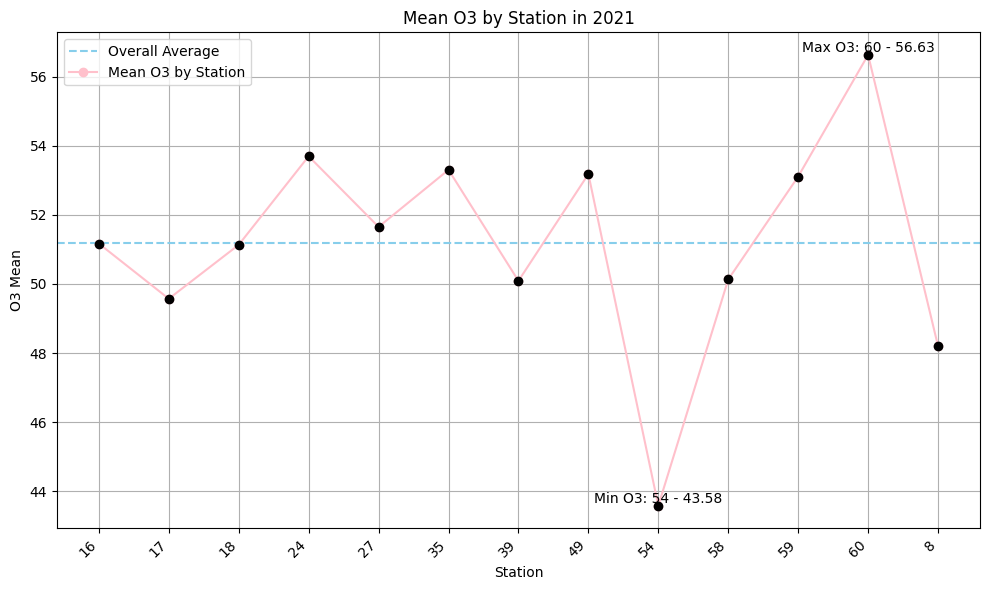

In [ ]:
# Filter data for the year 2021 and remove rows with NaN in 'O3'
df_2021_o3 = magnitud_n_restructured_df[(magnitud_n_restructured_df['ANO'] == 2021) & (~magnitud_n_restructured_df['O3'].isna())].copy()

# Convert station value to string
df_2021_o3['ESTACION'] = df_2021_o3['ESTACION'].astype(str)

# Group by 'ESTACION' and calculate the mean of 'O3' for the year 2021
o3_mean_by_station_2021 = df_2021_o3.groupby(['ESTACION'])['O3'].mean().reset_index()

# Get the station with the highest and lowest O3 values
station_max_o3_2021 = o3_mean_by_station_2021.loc[o3_mean_by_station_2021['O3'].idxmax()]
station_min_o3_2021 = o3_mean_by_station_2021.loc[o3_mean_by_station_2021['O3'].idxmin()]

# Print additional information
print("Information about stations in 2021:")
print(f"Station with highest O3 in 2021: {station_max_o3_2021['ESTACION']} with value {station_max_o3_2021['O3']:.2f}")
print(f"Station with lowest O3 in 2021: {station_min_o3_2021['ESTACION']} with value {station_min_o3_2021['O3']:.2f}")
print()

# Create the scatter plot with lines
overall_mean_2021 = o3_mean_by_station_2021['O3'].mean()
fig, ax = plt.subplots(figsize=(10, 6))
plt.axhline(y=overall_mean_2021, color='skyblue', linestyle='--', label='Overall Average')
plt.plot(o3_mean_by_station_2021['ESTACION'], o3_mean_by_station_2021['O3'], marker='o', color='pink', label='Mean O3 by Station')

for station, mean in zip(o3_mean_by_station_2021['ESTACION'], o3_mean_by_station_2021['O3']):
    plt.plot(station, mean, marker='o', color='black')

plt.title('Mean O3 by Station in 2021')
plt.xlabel('Station')
plt.ylabel('O3 Mean')
plt.xticks(rotation=45, ha='right')

plt.text(station_max_o3_2021['ESTACION'], station_max_o3_2021['O3'], f"Max O3: {station_max_o3_2021['ESTACION']} - {station_max_o3_2021['O3']:.2f}", ha='center', va='bottom')
plt.text(station_min_o3_2021['ESTACION'], station_min_o3_2021['O3'], f"Min O3: {station_min_o3_2021['ESTACION']} - {station_min_o3_2021['O3']:.2f}", ha='center', va='bottom')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<a name="AnalisisNO2covid"></a>
#### **Magnitud 8 (Dióxido de Nitrógeno)**

([Índice](#indice))

Information about stations in 2019:
Station with highest NO2 in 2019: 56 with value 53.18
Station with lowest NO2 in 2019: 58 with value 15.84



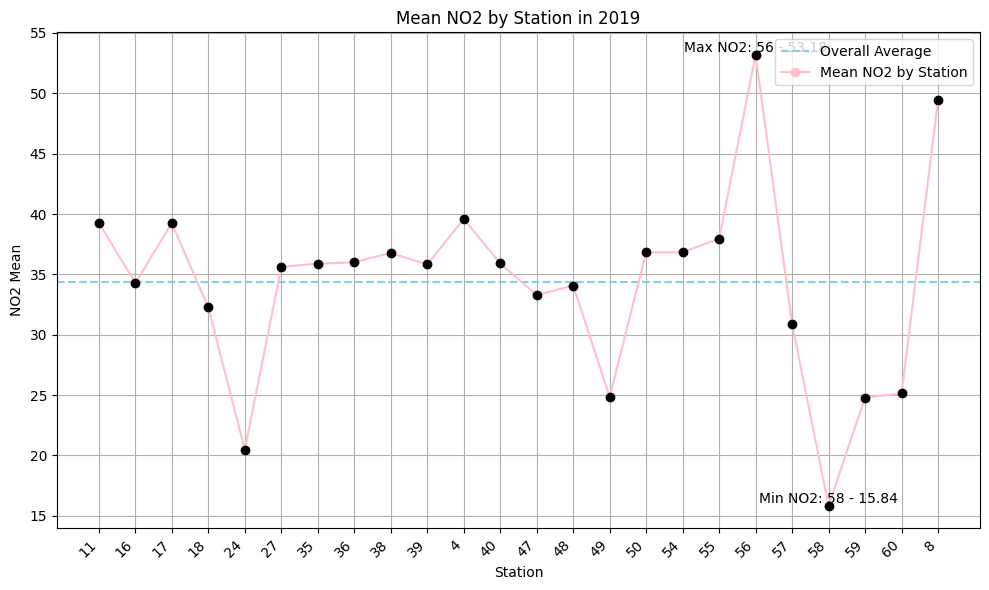

In [ ]:
# Filter data for the year 2019 and remove rows with NaN in 'NO2'
df_2019_no2 = magnitud_n_restructured_df[(magnitud_n_restructured_df['ANO'] == 2019) & (~magnitud_n_restructured_df['NO2'].isna())].copy()

# Convert station value to string
df_2019_no2['ESTACION'] = df_2019_no2['ESTACION'].astype(str)

# Group by 'ESTACION' and calculate the mean of 'NO2' for the year 2019
no2_mean_by_station_2019 = df_2019_no2.groupby(['ESTACION'])['NO2'].mean().reset_index()

# Get the station with the highest and lowest NO2 values
station_max_no2_2019 = no2_mean_by_station_2019.loc[no2_mean_by_station_2019['NO2'].idxmax()]
station_min_no2_2019 = no2_mean_by_station_2019.loc[no2_mean_by_station_2019['NO2'].idxmin()]

# Print additional information
print("Information about stations in 2019:")
print(f"Station with highest NO2 in 2019: {station_max_no2_2019['ESTACION']} with value {station_max_no2_2019['NO2']:.2f}")
print(f"Station with lowest NO2 in 2019: {station_min_no2_2019['ESTACION']} with value {station_min_no2_2019['NO2']:.2f}")
print()

# Create the scatter plot with lines
overall_mean_2019 = no2_mean_by_station_2019['NO2'].mean()
fig, ax = plt.subplots(figsize=(10, 6))
plt.axhline(y=overall_mean_2019, color='skyblue', linestyle='--', label='Overall Average')
plt.plot(no2_mean_by_station_2019['ESTACION'], no2_mean_by_station_2019['NO2'], marker='o', color='pink', label='Mean NO2 by Station')

for station, mean in zip(no2_mean_by_station_2019['ESTACION'], no2_mean_by_station_2019['NO2']):
    plt.plot(station, mean, marker='o', color='black')

plt.title('Mean NO2 by Station in 2019')
plt.xlabel('Station')
plt.ylabel('NO2 Mean')
plt.xticks(rotation=45, ha='right')

plt.text(station_max_no2_2019['ESTACION'], station_max_no2_2019['NO2'], f"Max NO2: {station_max_no2_2019['ESTACION']} - {station_max_no2_2019['NO2']:.2f}", ha='center', va='bottom')
plt.text(station_min_no2_2019['ESTACION'], station_min_no2_2019['NO2'], f"Min NO2: {station_min_no2_2019['ESTACION']} - {station_min_no2_2019['NO2']:.2f}", ha='center', va='bottom')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Information about stations in 2021:
Station with highest NO2 in 2021: 56 with value 40.58
Station with lowest NO2 in 2021: 58 with value 14.86



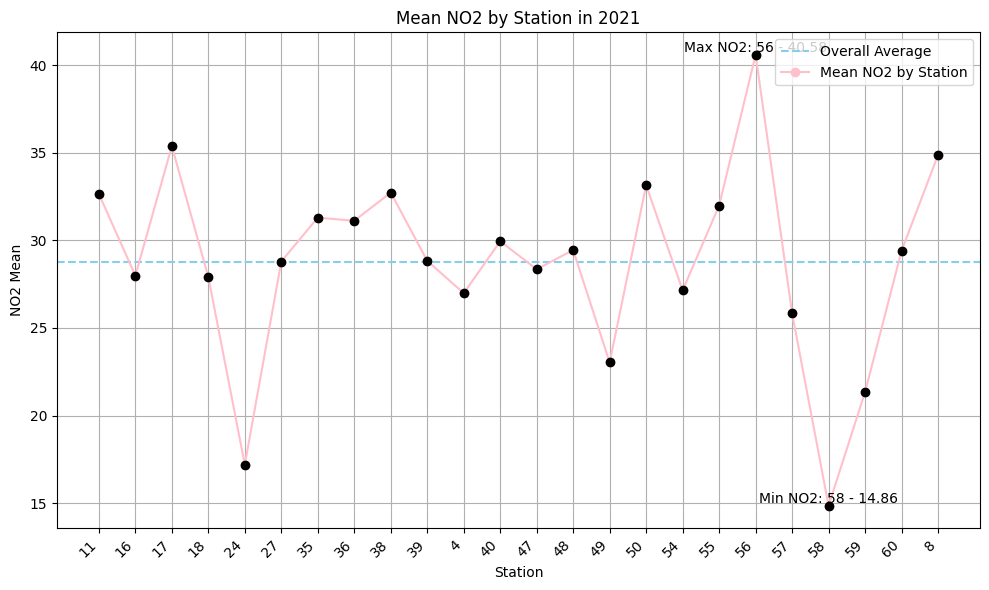

In [ ]:
# Filter data for the year 2021 and remove rows with NaN in 'NO2'
df_2021_no2 = magnitud_n_restructured_df[(magnitud_n_restructured_df['ANO'] == 2021) & (~magnitud_n_restructured_df['NO2'].isna())].copy()

# Convert station value to string
df_2021_no2['ESTACION'] = df_2021_no2['ESTACION'].astype(str)

# Group by 'ESTACION' and calculate the mean of 'NO2' for the year 2021
no2_mean_by_station_2021 = df_2021_no2.groupby(['ESTACION'])['NO2'].mean().reset_index()

# Get the station with the highest and lowest NO2 values
station_max_no2_2021 = no2_mean_by_station_2021.loc[no2_mean_by_station_2021['NO2'].idxmax()]
station_min_no2_2021 = no2_mean_by_station_2021.loc[no2_mean_by_station_2021['NO2'].idxmin()]

# Print additional information
print("Information about stations in 2021:")
print(f"Station with highest NO2 in 2021: {station_max_no2_2021['ESTACION']} with value {station_max_no2_2021['NO2']:.2f}")
print(f"Station with lowest NO2 in 2021: {station_min_no2_2021['ESTACION']} with value {station_min_no2_2021['NO2']:.2f}")
print()

# Create the scatter plot with lines
overall_mean_2021 = no2_mean_by_station_2021['NO2'].mean()
fig, ax = plt.subplots(figsize=(10, 6))
plt.axhline(y=overall_mean_2021, color='skyblue', linestyle='--', label='Overall Average')
plt.plot(no2_mean_by_station_2021['ESTACION'], no2_mean_by_station_2021['NO2'], marker='o', color='pink', label='Mean NO2 by Station')

for station, mean in zip(no2_mean_by_station_2021['ESTACION'], no2_mean_by_station_2021['NO2']):
    plt.plot(station, mean, marker='o', color='black')

plt.title('Mean NO2 by Station in 2021')
plt.xlabel('Station')
plt.ylabel('NO2 Mean')
plt.xticks(rotation=45, ha='right')

plt.text(station_max_no2_2021['ESTACION'], station_max_no2_2021['NO2'], f"Max NO2: {station_max_no2_2021['ESTACION']} - {station_max_no2_2021['NO2']:.2f}", ha='center', va='bottom')
plt.text(station_min_no2_2021['ESTACION'], station_min_no2_2021['NO2'], f"Min NO2: {station_min_no2_2021['ESTACION']} - {station_min_no2_2021['NO2']:.2f}", ha='center', va='bottom')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<a name="AnalisisPM10covid"></a>
#### **Magnitud 10 (Partículas PM10)**

([Índice](#indice))

Information about stations in 2019:
Station with highest PM10 in 2019: 55 with value 21.53
Station with lowest PM10 in 2019: 24 with value 12.96



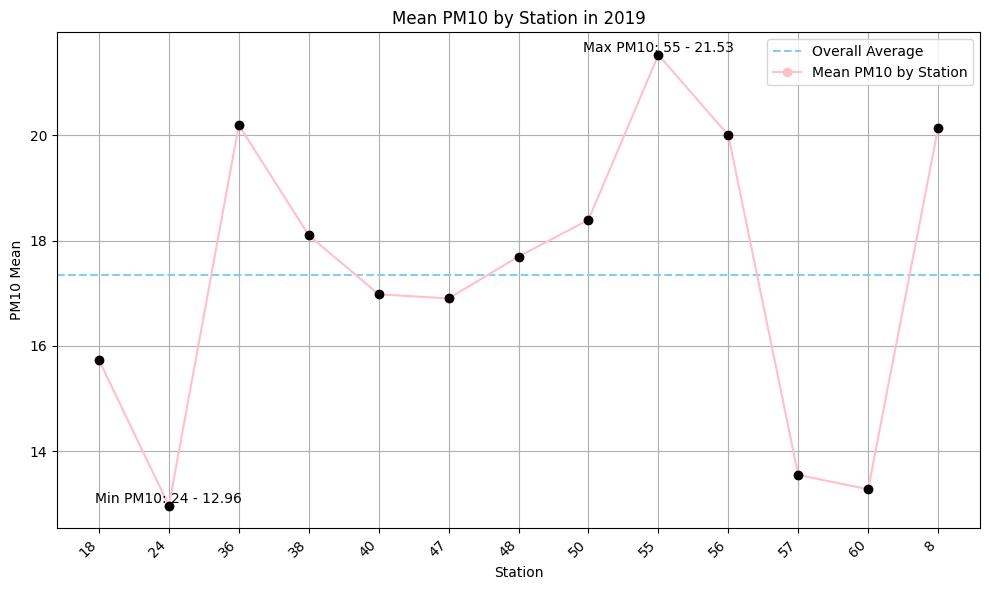

In [ ]:
# Filter data for the year 2019 and remove rows with NaN in 'PM10'
df_2019_pm10 = magnitud_n_restructured_df[(magnitud_n_restructured_df['ANO'] == 2019) & (~magnitud_n_restructured_df['PM10'].isna())].copy()

# Convert station value to string
df_2019_pm10['ESTACION'] = df_2019_pm10['ESTACION'].astype(str)

# Group by 'ESTACION' and calculate the mean of 'PM10' for the year 2019
pm10_mean_by_station_2019 = df_2019_pm10.groupby(['ESTACION'])['PM10'].mean().reset_index()

# Get the station with the highest and lowest PM10 values
station_max_pm10_2019 = pm10_mean_by_station_2019.loc[pm10_mean_by_station_2019['PM10'].idxmax()]
station_min_pm10_2019 = pm10_mean_by_station_2019.loc[pm10_mean_by_station_2019['PM10'].idxmin()]

# Print additional information
print("Information about stations in 2019:")
print(f"Station with highest PM10 in 2019: {station_max_pm10_2019['ESTACION']} with value {station_max_pm10_2019['PM10']:.2f}")
print(f"Station with lowest PM10 in 2019: {station_min_pm10_2019['ESTACION']} with value {station_min_pm10_2019['PM10']:.2f}")
print()

# Create the scatter plot with lines
overall_mean_2019 = pm10_mean_by_station_2019['PM10'].mean()
fig, ax = plt.subplots(figsize=(10, 6))
plt.axhline(y=overall_mean_2019, color='skyblue', linestyle='--', label='Overall Average')
plt.plot(pm10_mean_by_station_2019['ESTACION'], pm10_mean_by_station_2019['PM10'], marker='o', color='pink', label='Mean PM10 by Station')

for station, mean in zip(pm10_mean_by_station_2019['ESTACION'], pm10_mean_by_station_2019['PM10']):
    plt.plot(station, mean, marker='o', color='black')

plt.title('Mean PM10 by Station in 2019')
plt.xlabel('Station')
plt.ylabel('PM10 Mean')
plt.xticks(rotation=45, ha='right')

plt.text(station_max_pm10_2019['ESTACION'], station_max_pm10_2019['PM10'], f"Max PM10: {station_max_pm10_2019['ESTACION']} - {station_max_pm10_2019['PM10']:.2f}", ha='center', va='bottom')
plt.text(station_min_pm10_2019['ESTACION'], station_min_pm10_2019['PM10'], f"Min PM10: {station_min_pm10_2019['ESTACION']} - {station_min_pm10_2019['PM10']:.2f}", ha='center', va='bottom')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Information about stations in 2021:
Station with highest PM10 in 2021: 55 with value 23.53
Station with lowest PM10 in 2021: 60 with value 15.79



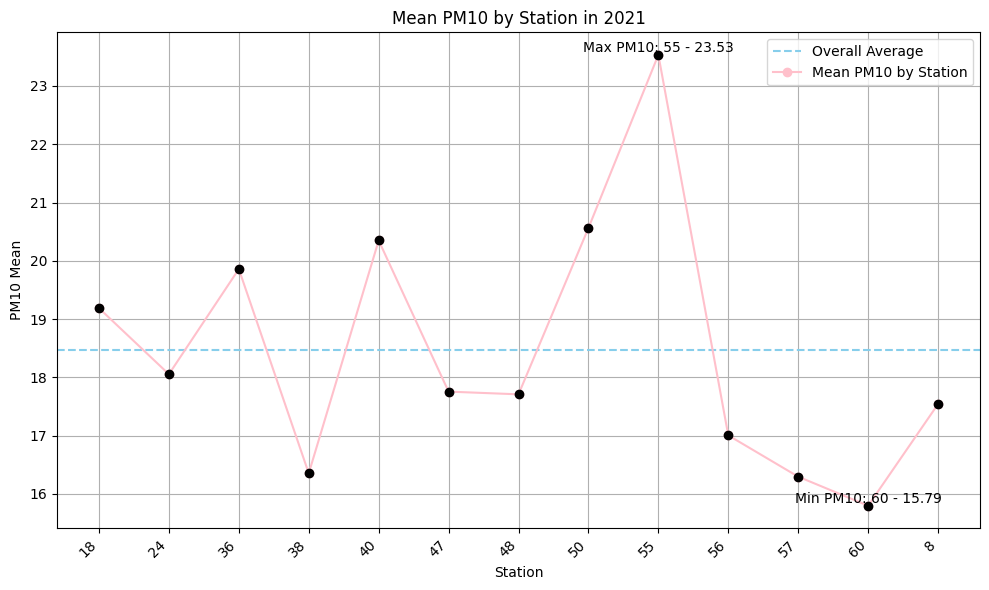

In [ ]:
# Filter data for the year 2021 and remove rows with NaN in 'PM10'
df_2021_pm10 = magnitud_n_restructured_df[(magnitud_n_restructured_df['ANO'] == 2021) & (~magnitud_n_restructured_df['PM10'].isna())].copy()

# Convert station value to string
df_2021_pm10['ESTACION'] = df_2021_pm10['ESTACION'].astype(str)

# Group by 'ESTACION' and calculate the mean of 'PM10' for the year 2021
pm10_mean_by_station_2021 = df_2021_pm10.groupby(['ESTACION'])['PM10'].mean().reset_index()

# Get the station with the highest and lowest PM10 values
station_max_pm10_2021 = pm10_mean_by_station_2021.loc[pm10_mean_by_station_2021['PM10'].idxmax()]
station_min_pm10_2021 = pm10_mean_by_station_2021.loc[pm10_mean_by_station_2021['PM10'].idxmin()]

# Print additional information
print("Information about stations in 2021:")
print(f"Station with highest PM10 in 2021: {station_max_pm10_2021['ESTACION']} with value {station_max_pm10_2021['PM10']:.2f}")
print(f"Station with lowest PM10 in 2021: {station_min_pm10_2021['ESTACION']} with value {station_min_pm10_2021['PM10']:.2f}")
print()

# Create the scatter plot with lines
overall_mean_2021 = pm10_mean_by_station_2021['PM10'].mean()
fig, ax = plt.subplots(figsize=(10, 6))
plt.axhline(y=overall_mean_2021, color='skyblue', linestyle='--', label='Overall Average')
plt.plot(pm10_mean_by_station_2021['ESTACION'], pm10_mean_by_station_2021['PM10'], marker='o', color='pink', label='Mean PM10 by Station')

for station, mean in zip(pm10_mean_by_station_2021['ESTACION'], pm10_mean_by_station_2021['PM10']):
    plt.plot(station, mean, marker='o', color='black')

plt.title('Mean PM10 by Station in 2021')
plt.xlabel('Station')
plt.ylabel('PM10 Mean')
plt.xticks(rotation=45, ha='right')

plt.text(station_max_pm10_2021['ESTACION'], station_max_pm10_2021['PM10'], f"Max PM10: {station_max_pm10_2021['ESTACION']} - {station_max_pm10_2021['PM10']:.2f}", ha='center', va='bottom')
plt.text(station_min_pm10_2021['ESTACION'], station_min_pm10_2021['PM10'], f"Min PM10: {station_min_pm10_2021['ESTACION']} - {station_min_pm10_2021['PM10']:.2f}", ha='center', va='bottom')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Función para comparar los valores máximos y mínimos de dos años
def compare_max_min(year1, year2, df_year1, df_year2, pollutant):
    # Obtener la estación con el máximo valor para cada año
    station_max_year1 = df_year1.loc[df_year1[pollutant].idxmax()]
    station_max_year2 = df_year2.loc[df_year2[pollutant].idxmax()]

    # Obtener la estación con el mínimo valor para cada año
    station_min_year1 = df_year1.loc[df_year1[pollutant].idxmin()]
    station_min_year2 = df_year2.loc[df_year2[pollutant].idxmin()]

    # Imprimir información sobre los valores máximos y mínimos
    print(f"Comparison for {pollutant}:")
    print("-------------------------------")
    print(f"Max value in {year1}: Station {station_max_year1['ESTACION']} with value {station_max_year1[pollutant]:.2f}")
    print(f"Max value in {year2}: Station {station_max_year2['ESTACION']} with value {station_max_year2[pollutant]:.2f}")
    print(f"Are max values equal?: {station_max_year1['ESTACION'] == station_max_year2['ESTACION']}")

    print(f"Min value in {year1}: Station {station_min_year1['ESTACION']} with value {station_min_year1[pollutant]:.2f}")
    print(f"Min value in {year2}: Station {station_min_year2['ESTACION']} with value {station_min_year2[pollutant]:.2f}")
    print(f"Are min values equal?: {station_min_year1['ESTACION'] == station_min_year2['ESTACION']}")
    print()

# Comparación para NO2
compare_max_min(2019, 2021, df_2019_no2, df_2021_no2, 'NO2')

# Comparación para O3
compare_max_min(2019, 2021, df_2019_o3, df_2021_o3, 'O3')

# Comparación para PM10
compare_max_min(2019, 2021, df_2019_pm10, df_2021_pm10, 'PM10')

Comparison for NO2:
-------------------------------
Max value in 2019: Station 8 with value 148.00
Max value in 2021: Station 38 with value 147.00
Are max values equal?: False
Min value in 2019: Station 4 with value 0.00
Min value in 2021: Station 4 with value 0.00
Are min values equal?: True

Comparison for O3:
-------------------------------
Max value in 2019: Station 18 with value 169.00
Max value in 2021: Station 60 with value 110.00
Are max values equal?: False
Min value in 2019: Station 8 with value 0.00
Min value in 2021: Station 8 with value 0.00
Are min values equal?: True

Comparison for PM10:
-------------------------------
Max value in 2019: Station 55 with value 87.00
Max value in 2021: Station 60 with value 677.00
Are max values equal?: False
Min value in 2019: Station 8 with value 0.00
Min value in 2021: Station 8 with value 0.00
Are min values equal?: True



In [ ]:
# Comparación de las estaciones con los valores máximos y mínimos en 2019 y 2021
print("\nEquality of Maximum and Minimum Stations between 2019 and 2021:")
print("-------------------------------------------------------------")

# Para NO2
no2_max_station_2019 = station_max_no2_2019['ESTACION']
no2_min_station_2019 = station_min_no2_2019['ESTACION']
no2_max_station_2021 = station_max_no2_2021['ESTACION']
no2_min_station_2021 = station_min_no2_2021['ESTACION']

print(f"NO2: Maximum station in 2019: {no2_max_station_2019}, Minimum station in 2019: {no2_min_station_2019}")
print(f"NO2: Maximum station in 2021: {no2_max_station_2021}, Minimum station in 2021: {no2_min_station_2021}")
print(f"NO2: Maximum stations are equal: {no2_max_station_2019 == no2_max_station_2021}, Minimum stations are equal: {no2_min_station_2019 == no2_min_station_2021}")

# Para O3
o3_max_station_2019 = station_max_o3_2019['ESTACION']
o3_min_station_2019 = station_min_o3_2019['ESTACION']
o3_max_station_2021 = station_max_o3_2021['ESTACION']
o3_min_station_2021 = station_min_o3_2021['ESTACION']

print(f"O3: Maximum station in 2019: {o3_max_station_2019}, Minimum station in 2019: {o3_min_station_2019}")
print(f"O3: Maximum station in 2021: {o3_max_station_2021}, Minimum station in 2021: {o3_min_station_2021}")
print(f"O3: Maximum stations are equal: {o3_max_station_2019 == o3_max_station_2021}, Minimum stations are equal: {o3_min_station_2019 == o3_min_station_2021}")

# Para PM10
pm10_max_station_2019 = station_max_pm10_2019['ESTACION']
pm10_min_station_2019 = station_min_pm10_2019['ESTACION']
pm10_max_station_2021 = station_max_pm10_2021['ESTACION']
pm10_min_station_2021 = station_min_pm10_2021['ESTACION']

print(f"PM10: Maximum station in 2019: {pm10_max_station_2019}, Minimum station in 2019: {pm10_min_station_2019}")
print(f"PM10: Maximum station in 2021: {pm10_max_station_2021}, Minimum station in 2021: {pm10_min_station_2021}")
print(f"PM10: Maximum stations are equal: {pm10_max_station_2019 == pm10_max_station_2021}, Minimum stations are equal: {pm10_min_station_2019 == pm10_min_station_2021}")



Equality of Maximum and Minimum Stations between 2019 and 2021:
-------------------------------------------------------------
NO2: Maximum station in 2019: 56, Minimum station in 2019: 58
NO2: Maximum station in 2021: 56, Minimum station in 2021: 58
NO2: Maximum stations are equal: True, Minimum stations are equal: True
O3: Maximum station in 2019: 60, Minimum station in 2019: 16
O3: Maximum station in 2021: 60, Minimum station in 2021: 54
O3: Maximum stations are equal: True, Minimum stations are equal: False
PM10: Maximum station in 2019: 55, Minimum station in 2019: 24
PM10: Maximum station in 2021: 55, Minimum station in 2021: 60
PM10: Maximum stations are equal: True, Minimum stations are equal: False


<a name="Calculadoras"></a>
## **Calculadoras**
([Índice](#indice))


En esta sección se han creado calculadoras para visualizar datos, que en ciertas ocasiones pueden ser útiles.

<a name="Calculadora1"></a>
### **Calculadora de días de mayor o menor valor en relación a una magnitud**
([Índice](#indice))


In [ ]:
valid_year = False
while not valid_year:
    try:
        year = int(input("Please enter the year (between 2001 and 2023): "))
        if year in magnitud_n_restructured_df['ANO'].unique():
            valid_year = True
        else:
            print("Error! The entered year is not within the available range.")
    except ValueError:
        print("Error! Please enter a valid year.")

valid_magnitude = False
while not valid_magnitude:
    magnitude = input("Please enter the magnitude (NO2, O3, or PM10): ").upper()
    if magnitude in ['NO2', 'O3', 'PM10']:
        valid_magnitude = True
    else:
        print("Error! The entered magnitude is not valid.")

valid_month = False
while not valid_month:
    try:
        month = int(input("Please enter the month (between 1 and 12): "))
        if 1 <= month <= 12:
            valid_month = True
        else:
            print("Error! The entered month is not within the valid range.")
    except ValueError:
        print("Error! Please enter a valid month.")

valid_station = False
while not valid_station:
    try:
        station = int(input("Please enter the station number: "))
        if station in magnitud_n_restructured_df['ESTACION'].unique():
            valid_station = True
        else:
            print("Error! The entered station number is not within the available range.")
    except ValueError:
        print("Error! Please enter a valid station number.")

filtered_df = magnitud_n_restructured_df[(magnitud_n_restructured_df['ANO'] == year) &
                                         (magnitud_n_restructured_df['MES'] == month) &
                                         (magnitud_n_restructured_df['ESTACION'] == station)]

max_value = filtered_df[magnitude].max()
if pd.notna(max_value):
    day_max_value = int(filtered_df.loc[filtered_df[magnitude].idxmax()]['DIA'])
else:
    day_max_value = "Not available"

min_value = filtered_df[magnitude].min()
if pd.notna(min_value):
    day_min_value = int(filtered_df.loc[filtered_df[magnitude].idxmin()]['DIA'])
else:
    day_min_value = "Not available"

print()
if pd.notna(max_value):
    print(f"For the year {year}, the magnitude {magnitude} had its MAXIMUM value on day {day_max_value} at station {station}, with a value of {max_value}.")
else:
    print(f"For the year {year}, the magnitude {magnitude} does not have information in the dataset for the day with maximum value.")

if pd.notna(min_value):
    print(f"For the year {year}, the magnitude {magnitude} had its MINIMUM value on day {day_min_value} at station {station}, with a value of {min_value}.")
else:
    print(f"For the year {year}, the magnitude {magnitude} does not have information in the dataset for the day with minimum value.")

Please enter the year (between 2001 and 2023): 2022
Please enter the magnitude (NO2, O3, or PM10): O3
Please enter the month (between 1 and 12): 4
Please enter the station number: 4

For the year 2022, the magnitude O3 does not have information in the dataset for the day with maximum value.
For the year 2022, the magnitude O3 does not have information in the dataset for the day with minimum value.


<a name="Calculadora2"></a>
### **Calculadora Índice de Calidad del Aire (ICA)**
([Índice](#indice))


In [ ]:
day = int(input("Enter the day: "))
month = int(input("Enter the month: "))
year = int(input("Enter the year: "))
station = int(input("Enter the station number: "))

filter_condition = (magnitud_n_restructured_df['DIA'] == day) & (magnitud_n_restructured_df['MES'] == month) &  (magnitud_n_restructured_df['ANO'] == year) & (magnitud_n_restructured_df['ESTACION'] == station)

data_df = magnitud_n_restructured_df[filter_condition]

if data_df.empty:
    print("No data found for the provided date and station.")
else:
    no2 = data_df['NO2'].values[0]
    o3 = data_df['O3'].values[0]
    pm10 = data_df['PM10'].values[0]

    def assign_quality(contaminant, value):
        if contaminant == "PM10":
            if value <= 25:
                return "Very good"
            elif value <= 50:
                return "Good"
            elif value <= 90:
                return "Bad"
            elif value <= 180:
                return "Very bad"
            else:
                return ">180"
        elif contaminant == "NO2":
            if value <= 50:
                return "Very good"
            elif value <= 100:
                return "Good"
            elif value <= 200:
                return "Bad"
            elif value <= 400:
                return "Very bad"
            else:
                return ">400"
        elif contaminant == "O3":
            if value <= 60:
                return "Very good"
            elif value <= 120:
                return "Good"
            elif value <= 180:
                return "Bad"
            elif value <= 240:
                return "Very bad"
            else:
                return ">240"
    print()

    print(f"For station {station}, on {day}/{month}/{year}:")
    print()
    print(f"NO2: {no2}, Air quality: {assign_quality('NO2', no2)}")
    print(f"O3: {o3}, Air quality: {assign_quality('O3', o3)}")
    print(f"PM10: {pm10}, Air quality: {assign_quality('PM10', pm10)}")


Enter the day: 4
Enter the month: 4
Enter the year: 2020
Enter the station number: 4

For station 4, on 4/4/2020:

NO2: 0.0, Air quality: Very good
O3: nan, Air quality: >240
PM10: nan, Air quality: >180


In [ ]:
magnitud_n_restructured_df_example = magnitud_n_restructured_df

filtered_df_example = magnitud_n_restructured_df_example[(magnitud_n_restructured_df_example['ANO'] == 2020) & (magnitud_n_restructured_df_example['MES'] == 4) &
                                                         (magnitud_n_restructured_df_example['DIA'] == 11)& (magnitud_n_restructured_df_example['ESTACION'] == 24)]
filtered_df_example.reset_index(drop=True, inplace=True)
print(filtered_df_example[['ANO', 'MES', 'DIA', 'ESTACION', 'NO2','O3','PM10']])

    ANO  MES  DIA  ESTACION  NO2    O3  PM10
0  2020    4   11        24  6.0  54.0  11.0
